<a href="https://colab.research.google.com/github/DivyaAnilaP/ChatBot/blob/main/Plant_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install kaggle

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)


100%|██████████| 2.70G/2.70G [02:02<00:00, 23.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import glob as gb
import cv2

In [7]:
train='/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2'


In [9]:
len(train)

79

In [10]:
size=24
train_generator=tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=90,width_shift_range=0.0,height_shift_range=0.0,shear_range=0.0,zoom_range=0.0,horizontal_flip=True,vertical_flip=True,rescale=1./255,preprocessing_function=None,validation_split=0.1).flow_from_directory(train,target_size=(size,size),batch_size=164,class_mode='categorical',color_mode='rgb',subset='training',shuffle=True)

Found 158192 images belonging to 3 classes.


In [11]:
train_generator.class_indices

{'New Plant Diseases Dataset(Augmented)': 0,
 'new plant diseases dataset(augmented)': 1,
 'test': 2}

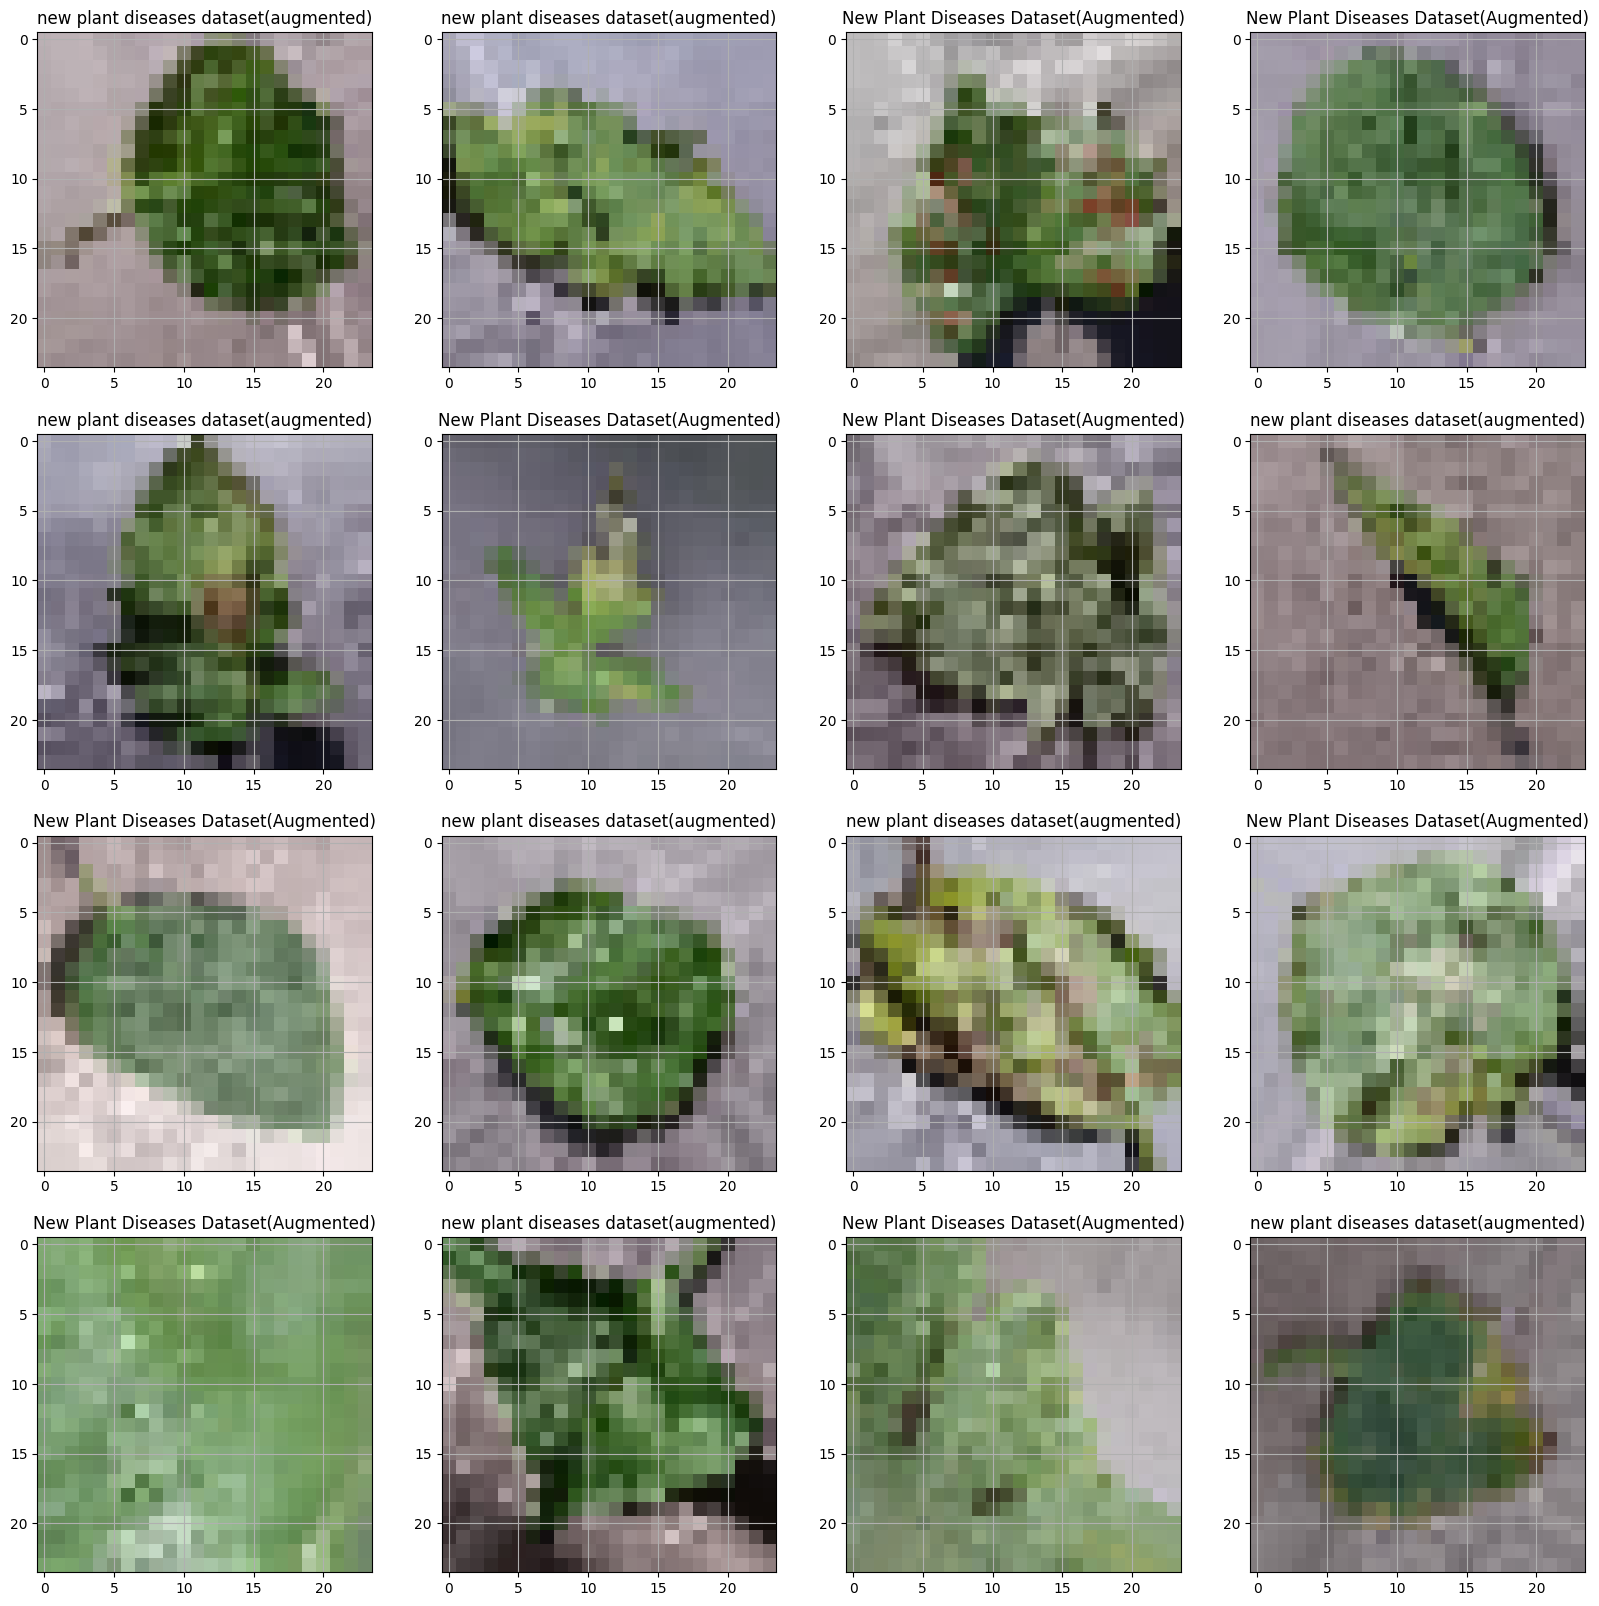

In [12]:
classes=list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch,y_batch in train_generator:
  for i in range(0,16):
    plt.subplot(4,4,i+1)
    plt.imshow(X_batch[i])
    plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    plt.grid(None)
  plt.show()
  break


In [16]:
valid='/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2'

In [17]:
valid_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,preprocessing_function=None,validation_split=0.1).flow_from_directory(valid,target_size=(size,size),batch_size=164,class_mode='categorical',color_mode='rgb',subset='validation',shuffle=False)


Found 17575 images belonging to 3 classes.


In [18]:
test='/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2'

In [19]:
test_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0,preprocessing_function=None).flow_from_directory(test,target_size=(244,244),batch_size=164,class_mode='categorical',color_mode='rgb',shuffle=False)

Found 175767 images belonging to 3 classes.
